<div style="border:solid green 2px; padding: 20px">
    
<b>Hello!</b> We're glad to see you in code-reviewer territory. You've done a great job on the project, but let's get to know each other and make it even better! We have our own atmosphere here and a few rules:


1. My name is Alexander Matveevsky. I work as a code reviewer, and my main goal is not to point out your mistakes, but to share my experience and help you become a data analyst.
2. We speak on a first-come-first-served basis.
3. if you want to write or ask a question, don't be shy. Just choose your color for your comment.  
4. this is a training project, you don't have to be afraid of making a mistake.  
5. You have an unlimited number of attempts to pass the project.  
6. Let's Go!


---
I'll be color-coding comments, please don't delete them:

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Remarks. Some recommendations.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Success. Everything is done succesfully.
</div>
    
---
    
I suggest that we work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track changes if you highlight your comments:   
    
<div class="alert alert-info"> <b>Student сomments:</b> Student answer..</div>
    
All this will help to make the recheck of your project faster. If you have any questions about my comments, let me know, we'll figure it out together :)   
    
---

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


An excellent practice is to describe the goal and main steps in your own words (a skill that will help a lot on a final project). It would be good to add the progress and purpose of the study.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

## Load data

In [2]:
# Load the data files into different DataFrames
calls_df = pd.read_csv("/datasets/megaline_calls.csv")
internet_df = pd.read_csv("/datasets/megaline_internet.csv")
messages_df = pd.read_csv("/datasets/megaline_messages.csv")
plans_df = pd.read_csv("/datasets/megaline_plans.csv")
users_df = pd.read_csv("/datasets/megaline_users.csv")

In [3]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [4]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [5]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [6]:
plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [7]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


## Prepare the data

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__

It would be good to comment on the data somehow

## Plans

In [8]:
# Print the general/summary information about the plans' DataFrame
plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [9]:
# Print a sample of data for plans
plans_df.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

The data types might need some changes, as not all of the data types for prices is in float. 
We can fix this by changing the data type

There are no missing values in any of the columns. All columns have the same number of non-null entries as the number of rows.

## Fix data

[Fix obvious issues with the data given the initial observations.]

In [10]:
plans_df['usd_monthly_pay'] = plans_df['usd_monthly_pay'].astype(float)
plans_df['usd_per_gb'] = plans_df['usd_per_gb'].astype(float)
plans_df.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20.0,10.0,0.03,0.03,surf
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate


## Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Users

In [11]:
# Print the general/summary information about the users' DataFrame
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [12]:
# Print a sample of data for users
users_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

The data types might need some changes, reg_date dan churn date are not in datetime data type.
We can fix this by changing the data type.

There are missing valuesin churn_date.
Since Nan in churn_date means they are still using the calling plan, we can change it to NaT to indicate that the user is still in the subscription and data is not missing.

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [13]:
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'])
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], errors='coerce')
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [14]:
users_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

with the information in the dataset we can calculate subscription duration

In [15]:
users_df['subscription_duration'] = (users_df['churn_date'] - users_df['reg_date']).dt.days
users_df['subscription_duration'] = users_df['subscription_duration'].astype('Int64', errors='ignore')
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                500 non-null    int64         
 1   first_name             500 non-null    object        
 2   last_name              500 non-null    object        
 3   age                    500 non-null    int64         
 4   city                   500 non-null    object        
 5   reg_date               500 non-null    datetime64[ns]
 6   plan                   500 non-null    object        
 7   churn_date             34 non-null     datetime64[ns]
 8   subscription_duration  34 non-null     Int64         
dtypes: Int64(1), datetime64[ns](2), int64(2), object(4)
memory usage: 35.8+ KB


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

All right

## Calls

In [16]:
# Print the general/summary information about the calls' DataFrame
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [17]:
# Print a sample of data for calls
calls_df.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

The data types might need some changes, for call_date is not in datetime. 
We can fix this by changing the data type

There are no missing values in any of the columns. All columns have the same number of non-null entries as the number of rows.

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [18]:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

At the end of each session, the call duration is rounded upwards

In [19]:
calls_df['rounded_duration'] = np.ceil(calls_df['duration'])
calls_df

,id,user_id,call_date,duration,rounded_duration
0,1000_93,1000,2018-12-27,8.52,9.0
1,1000_145,1000,2018-12-27,13.66,14.0
2,1000_247,1000,2018-12-27,14.48,15.0
3,1000_309,1000,2018-12-28,5.76,6.0
4,1000_380,1000,2018-12-30,4.22,5.0
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,9.0
137731,1499_200,1499,2018-10-20,10.89,11.0
137732,1499_201,1499,2018-09-21,8.12,9.0
137733,1499_202,1499,2018-10-10,0.37,1.0


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

All right

In [20]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                137735 non-null  object        
 1   user_id           137735 non-null  int64         
 2   call_date         137735 non-null  datetime64[ns]
 3   duration          137735 non-null  float64       
 4   rounded_duration  137735 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 5.3+ MB


<div class="alert alert-info"> 
    <b>Student сomments:</b>updated
</div>

## Messages

In [21]:
# Print the general/summary information about the messages' DataFrame
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [22]:
# Print a sample of data for messages
messages_df.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

The data types might need some changes, for message_date it is not in datetime.
We can fix this by changing the data type

There are no missing values in any of the columns. All columns have the same number of non-null entries as the number of rows.

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [23]:
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Internet

In [24]:
# Print the general/summary information about the internet DataFrame
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [25]:
# Print a sample of data for the internet traffic
internet_df.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

The data types might need some changes, for session_date it is not in datetime.
We can fix this by changing the data type

There are no missing values in any of the columns. All columns have the same number of non-null entries as the number of rows.

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

No check for duplicates. Please add

In [26]:
duplicates = internet_df.duplicated()

duplicate_rows = internet_df[duplicates]
duplicate_rows

,id,user_id,session_date,mb_used


<div class="alert alert-info"> 
    <b>Student сomments:</b>
    no duplicates in internet df
</div>

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Сorrect

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [27]:
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [28]:
# Print out the plan conditions and make sure they are clear for you
plans_df

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20.0,10.0,0.03,0.03,surf
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [29]:
# Calculate the number of calls made by each user per month. Save the result.
calls_df['month_year'] = calls_df['call_date'].dt.to_period('M')
calls_per_month = calls_df.groupby(['user_id', 'month_year']).size().reset_index(name='calls_per_month')
calls_per_month

,user_id,month_year,calls_per_month
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64
...,...,...,...
2253,1498,2018-12,39
2254,1499,2018-09,41
2255,1499,2018-10,53
2256,1499,2018-11,45


In [30]:
# Calculate the amount of minutes spent by each user per month. Save the result.
minutes_per_month = calls_df.groupby(['user_id', 'month_year'])['rounded_duration'].sum().reset_index(name='minutes_per_month')
minutes_per_month

,user_id,month_year,minutes_per_month
0,1000,2018-12,124.0
1,1001,2018-08,182.0
2,1001,2018-09,315.0
3,1001,2018-10,393.0
4,1001,2018-11,426.0
...,...,...,...
2253,1498,2018-12,339.0
2254,1499,2018-09,346.0
2255,1499,2018-10,385.0
2256,1499,2018-11,308.0


In [31]:
# Calculate the number of messages sent by each user per month. Save the result.
messages_df['month_year'] = messages_df['message_date'].dt.to_period('M')

messages_per_month = messages_df.groupby(['user_id', 'month_year']).size().reset_index(name='messages_per_month')
messages_per_month

,user_id,month_year,messages_per_month
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


In [32]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet_df['month_year'] = internet_df['session_date'].dt.to_period('M')

traffic_per_month = internet_df.groupby(['user_id', 'month_year'])['mb_used'].sum().reset_index(name='traffic_per_month')
traffic_per_month

,user_id,month_year,traffic_per_month
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30
...,...,...,...
2272,1498,2018-12,23137.69
2273,1499,2018-09,12984.76
2274,1499,2018-10,19492.43
2275,1499,2018-11,16813.83


[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [33]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
merged_df = pd.merge(calls_per_month, minutes_per_month, on=['user_id', 'month_year'], how='outer')
merged_df = pd.merge(merged_df, messages_per_month, on=['user_id', 'month_year'], how='outer')
merged_df = pd.merge(merged_df, traffic_per_month, on=['user_id', 'month_year'], how='outer')
merged_df.head()

,user_id,month_year,calls_per_month,minutes_per_month,messages_per_month,traffic_per_month
0,1000,2018-12,16.0,124.0,11.0,1901.47
1,1001,2018-08,27.0,182.0,30.0,6919.15
2,1001,2018-09,49.0,315.0,44.0,13314.82
3,1001,2018-10,65.0,393.0,53.0,22330.49
4,1001,2018-11,64.0,426.0,36.0,18504.30


<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__
At the end of each month, megabytes are converted to gigabytes and rounded upwards

In [34]:
merged_df['traffic_per_month'] = np.ceil(merged_df['traffic_per_month'] / 1024)
merged_df.head()

,user_id,month_year,calls_per_month,minutes_per_month,messages_per_month,traffic_per_month
0,1000,2018-12,16.0,124.0,11.0,2.0
1,1001,2018-08,27.0,182.0,30.0,7.0
2,1001,2018-09,49.0,315.0,44.0,14.0
3,1001,2018-10,65.0,393.0,53.0,23.0
4,1001,2018-11,64.0,426.0,36.0,19.0


<div class="alert alert-info"> 
    <b>Student сomments:</b>
    megabytes are converted to gigabytes and rounded upwards
</div>

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Well done

In [35]:
# Add the plan information
merged_df = pd.merge(merged_df, users_df, on='user_id', how='inner')

merged_df = pd.merge(merged_df, plans_df, left_on='plan', right_on='plan_name', how='left')


In [36]:
merged_df.head()

,user_id,month_year,calls_per_month,minutes_per_month,messages_per_month,traffic_per_month,first_name,last_name,age,city,...,churn_date,subscription_duration,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,2018-12,16.0,124.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,NaT,<NA>,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate
1,1001,2018-08,27.0,182.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,<NA>,50,15360,500,20.0,10.0,0.03,0.03,surf
2,1001,2018-09,49.0,315.0,44.0,14.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,<NA>,50,15360,500,20.0,10.0,0.03,0.03,surf
3,1001,2018-10,65.0,393.0,53.0,23.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,<NA>,50,15360,500,20.0,10.0,0.03,0.03,surf
4,1001,2018-11,64.0,426.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,NaT,<NA>,50,15360,500,20.0,10.0,0.03,0.03,surf


[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [37]:
# Calculate the monthly revenue for each user
merged_df['monthly_revenue'] = (
    merged_df['usd_monthly_pay'] +
    merged_df['usd_per_minute'] * merged_df['minutes_per_month'] +
    merged_df['usd_per_gb'] * (merged_df['traffic_per_month'] / 1024) +
    merged_df['usd_per_message'] * merged_df['messages_per_month']
)

merged_df[['user_id', 'monthly_revenue']]

,user_id,monthly_revenue
0,1000,71.363672
1,1001,26.428359
2,1001,30.906719
3,1001,33.604609
4,1001,34.045547
...,...,...
2288,1204,NaN
2289,1349,NaN
2290,1349,NaN
2291,1349,NaN


<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

NAN result cannot be obtained because there is a subscription fee

In [38]:
merged_df[['user_id', 'monthly_revenue']].isna().count()

user_id            2293
monthly_revenue    2293
dtype: int64

In [39]:
for i in range(len(merged_df['monthly_revenue'])):
    if merged_df['plan'][i] == 'ultimate':
        if pd.isna(merged_df['monthly_revenue'][i]):
            merged_df['monthly_revenue'][i] = 70
    elif merged_df['plan'][i] == 'surf':
        if pd.isna(merged_df['monthly_revenue'][i]):
            merged_df['monthly_revenue'][i] = 30


/tmp/ipykernel_44/211597375.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['monthly_revenue'][i] = 30
/tmp/ipykernel_44/211597375.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['monthly_revenue'][i] = 70


In [40]:
merged_df[['user_id', 'monthly_revenue']]

,user_id,monthly_revenue
0,1000,71.363672
1,1001,26.428359
2,1001,30.906719
3,1001,33.604609
4,1001,34.045547
...,...,...
2288,1204,70.000000
2289,1349,30.000000
2290,1349,30.000000
2291,1349,30.000000


<div class="alert alert-info"> 
    <b>Student сomments:</b>
    NAN result a change to their respective subscription fee
</div>

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Now correct

In [41]:
merged_df = merged_df.sort_values(by='month_year')

## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

In [42]:
#total unique ultimate plan user
len(merged_df[merged_df['plan'] == 'ultimate']['user_id'].unique())

157

In [43]:
#total unique ultimate plan user
len(merged_df[merged_df['plan'] == 'surf']['user_id'].unique())

333

### Calls

In [44]:
merged_df.columns

Index(['user_id', 'month_year', 'calls_per_month', 'minutes_per_month',
       'messages_per_month', 'traffic_per_month', 'first_name', 'last_name',
       'age', 'city', 'reg_date', 'plan', 'churn_date',
       'subscription_duration', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message',
       'usd_per_minute', 'plan_name', 'monthly_revenue'],
      dtype='object')

In [45]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
average_duration_per_month = merged_df.groupby(['plan', 'month_year'])['minutes_per_month'].mean().reset_index()

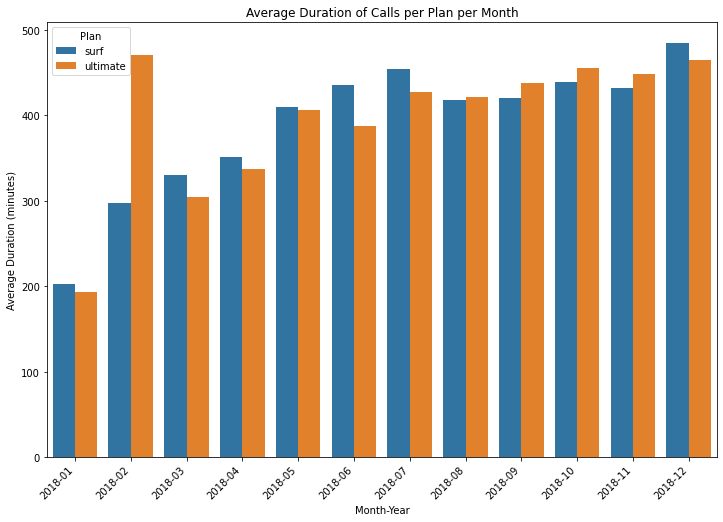

In [46]:
plt.figure(figsize=(12, 8))
sns.barplot(x='month_year', y='minutes_per_month', hue='plan', data=average_duration_per_month)
plt.title('Average Duration of Calls per Plan per Month')
plt.xlabel('Month-Year')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Plan')
plt.show()

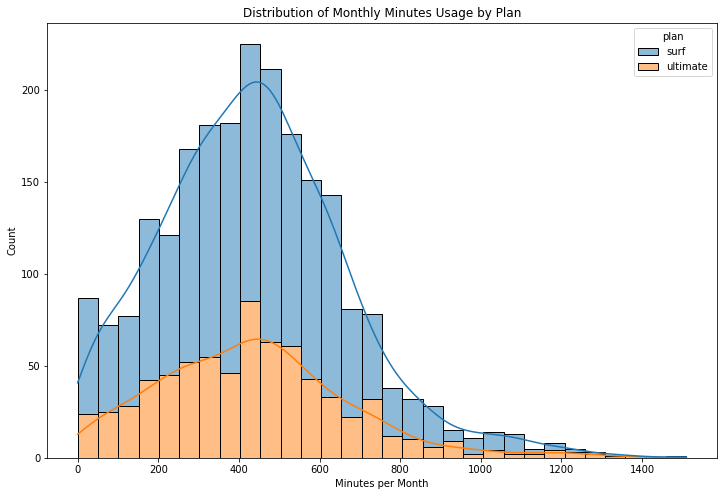

In [47]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
plt.figure(figsize=(12, 8))
sns.histplot(data=merged_df, x='minutes_per_month', hue='plan', multiple='stack', bins=30, kde=True)
plt.title('Distribution of Monthly Minutes Usage by Plan')
plt.xlabel('Minutes per Month')
plt.ylabel('Count')
plt.show()

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Great visualization. Well done

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

It is better after each section, graph (or series of tests) to write a conclusion on the obtained data taking into account the set business task - so it is easier to read the project, because future colleagues or customers will not have to interpret the results of each section, test or graph themselves.

<div class="alert alert-info"> 
    <b>Student сomments:</b>
    both plans have similar behaviour but 'surf' plan have a higher distribution in Monthly Minutes Usage
</div>

In [48]:
# Calculate the mean and the variance of the monthly call duration
call_duration_stats = merged_df.groupby(['plan', 'month_year'])['minutes_per_month'].agg(['mean', 'var']).reset_index()
call_duration_stats

,plan,month_year,mean,var
0,surf,2018-01,203.000000,15842.000000
1,surf,2018-02,297.000000,52226.500000
2,surf,2018-03,330.000000,35809.363636
3,surf,2018-04,351.540000,50866.743265
4,surf,2018-05,410.240000,56938.779459
5,surf,2018-06,435.791667,44094.061404
6,surf,2018-07,453.733333,59802.012325
7,surf,2018-08,417.849057,52122.749224
8,surf,2018-09,420.732984,44579.912538
9,surf,2018-10,438.991379,49326.952306


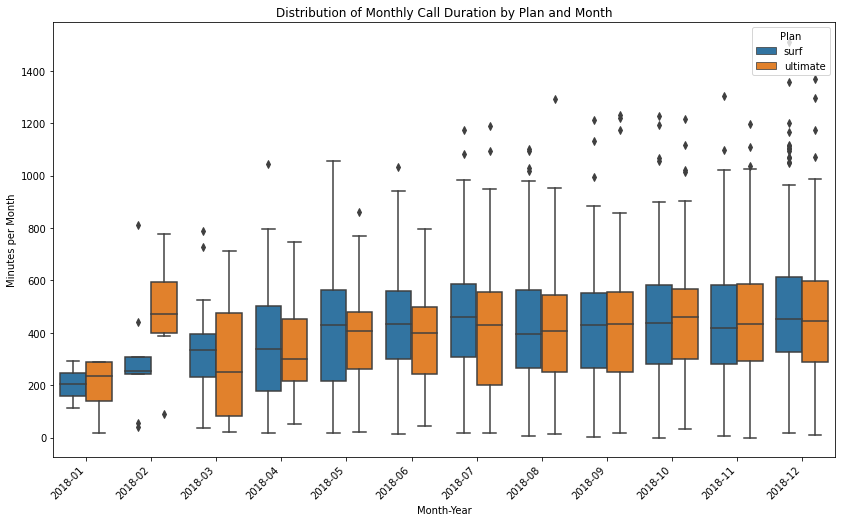

In [49]:
# Plot a boxplot to visualize the distribution of the monthly call duration
plt.figure(figsize=(14, 8))
sns.boxplot(x='month_year', y='minutes_per_month', hue='plan', data=merged_df)
plt.title('Distribution of Monthly Call Duration by Plan and Month')
plt.xlabel('Month-Year')
plt.ylabel('Minutes per Month')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Plan', loc='upper right')
plt.show()

[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

 Generally, both plans have a similar pattern and similar average duration calls. on the second month ultimate have a huge increase in call duration.

### Messages

In [50]:
messages_stats = merged_df.groupby('plan_name')['messages_per_month']
messages_stats.describe()

,count,mean,std,min,25%,50%,75%,max
plan_name,,,,,,,,
surf,1222.0,40.109656,33.035500,1.0,16.0,32.0,54.0,266.0
ultimate,584.0,46.296233,32.942118,1.0,21.0,41.0,66.0,166.0


In [51]:
messages_stats = merged_df.groupby(['month_year', 'plan_name'])['messages_per_month']
messages_stats.describe()

count       mean        std   min    25%   50%    75%  \
month_year plan_name                                                          
2018-01    surf         1.0  21.000000        NaN  21.0  21.00  21.0  21.00   
           ultimate     3.0  20.666667  17.616280   2.0  12.50  23.0  30.00   
2018-02    surf         5.0  21.600000  22.645088   3.0   7.00  11.0  29.00   
           ultimate     6.0  25.166667  21.572359   8.0  12.75  19.0  25.25   
2018-03    surf        16.0  21.937500  18.763329   1.0   6.25  18.5  32.25   
           ultimate     7.0  34.714286  24.777102   9.0  18.00  26.0  50.00   
2018-04    surf        36.0  24.166667  23.109058   1.0   6.75  18.5  34.50   
           ultimate    16.0  28.937500  22.646468   5.0  12.50  20.5  34.75   
2018-05    surf        56.0  33.017857  29.460909   1.0  13.50  26.0  48.00   
           ultimate    21.0  44.333333  35.311943   5.0  15.00  35.0  64.00   
2018-06    surf        73.0  33.616438  30.600758   1.0  10.00  27.0  49.00   
           ultimate    38.0  36.289474  28.411939   2.0  15.25  31.0  57.00   
2018-07    surf        91.0  35.945055  30.132803   1.0  13.50  30.0  50.00   
           ultimate    47.0  41.212766  29.293074   1.0  21.50  35.0  56.50   
2018-08    surf       124.0  37.596774  31.832621   1.0  14.75  31.0  50.00   
           ultimate    57.0  47.929825  32.161901   2.0  20.00  42.0  71.00   
2018-09    surf       151.0  39.523179  30.709137   2.0  17.50  31.0  53.00   
           ultimate    71.0  45.901408  30.056212   2.0  25.50  47.0  63.00   
2018-10    surf       189.0  42.433862  35.135333   2.0  17.00  35.0  57.00   
           ultimate    89.0  46.977528  33.151847   2.0  23.00  40.0  65.00   
2018-11    surf       226.0  40.553097  31.662657   1.0  18.00  33.0  51.50   
           ultimate   103.0  47.601942  33.019703   1.0  21.50  41.0  66.50   
2018-12    surf       254.0  48.326772  36.812090   1.0  24.00  38.0  64.00   
           ultimate   126.0  53.936508  37.064861   2.0  24.25  48.5  77.00   

                        max  
month_year plan_name         
2018-01    surf        21.0  
           ultimate    37.0  
2018-02    surf        58.0  
           ultimate    67.0  
2018-03    surf        59.0  
           ultimate    72.0  
2018-04    surf       120.0  
           ultimate    77.0  
2018-05    surf       149.0  
           ultimate   149.0  
2018-06    surf       133.0  
           ultimate   143.0  
2018-07    surf       164.0  
           ultimate   149.0  
2018-08    surf       156.0  
           ultimate   151.0  
2018-09    surf       153.0  
           ultimate   155.0  
2018-10    surf       224.0  
           ultimate   153.0  
2018-11    surf       180.0  
           ultimate   166.0  
2018-12    surf       266.0  
           ultimate   150.0

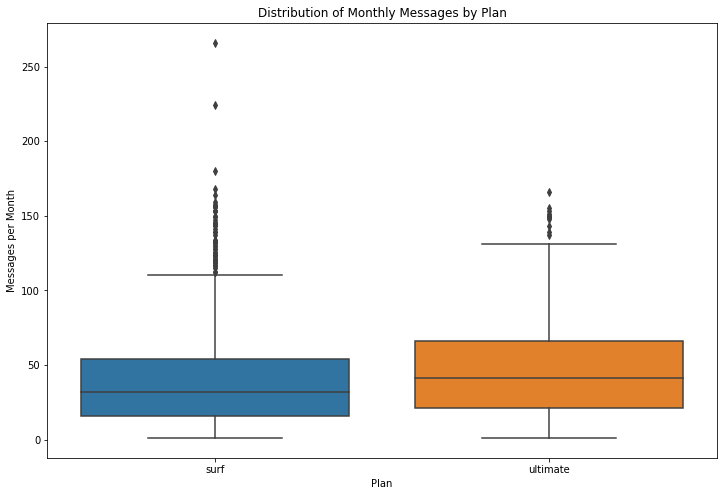

In [52]:
# Compare the number of messages users of each plan tend to send each month
plt.figure(figsize=(12, 8))
sns.boxplot(x='plan', y='messages_per_month', data=merged_df)
plt.title('Distribution of Monthly Messages by Plan')
plt.xlabel('Plan')
plt.ylabel('Messages per Month')
plt.show()

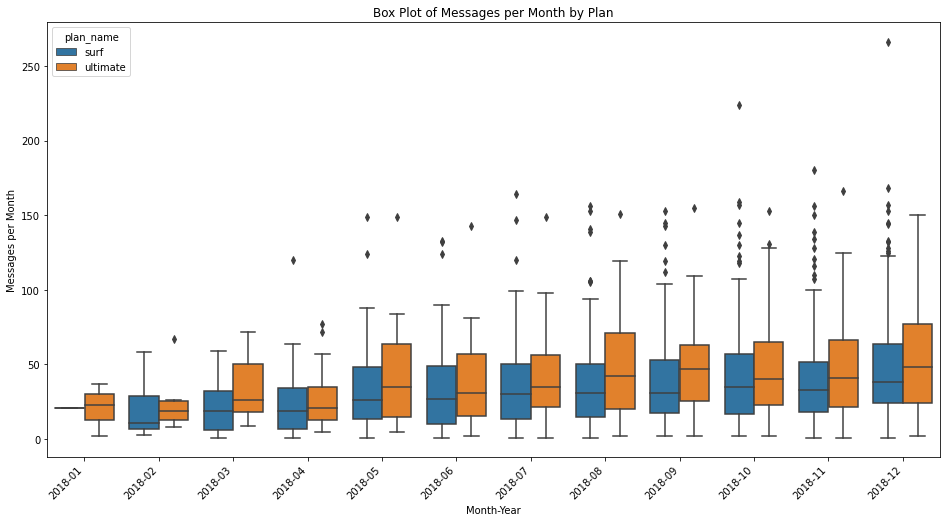

In [53]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='month_year', y='messages_per_month', hue='plan_name', data=merged_df)
plt.title("Box Plot of Messages per Month by Plan")
plt.xlabel('Month-Year')
plt.ylabel('Messages per Month')
plt.xticks(rotation=45, ha='right')
plt.show()

[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

 althought it looks close, but people that uses ultimate plan tend to send more text messages. 

### Internet

In [54]:
internet_stats = merged_df.groupby('plan_name')['traffic_per_month']
internet_stats.describe()

,count,mean,std,min,25%,50%,75%,max
plan_name,,,,,,,,
surf,1558.0,17.201540,7.877707,1.0,13.0,17.0,22.0,71.0
ultimate,719.0,17.744089,7.842896,1.0,13.0,17.0,22.0,47.0


In [55]:
internet_stats = merged_df.groupby(['month_year', 'plan_name'])['traffic_per_month']
internet_stats.describe()

count       mean        std  min    25%   50%    75%  \
month_year plan_name                                                         
2018-01    surf         2.0   5.000000   4.242641  2.0   3.50   5.0   6.50   
           ultimate     4.0   7.250000   3.862210  2.0   5.75   8.0   9.50   
2018-02    surf         9.0  12.666667   6.652067  1.0   8.00  12.0  17.00   
           ultimate     7.0  17.571429   6.320790  5.0  16.50  21.0  21.00   
2018-03    surf        23.0  13.782609   8.218364  2.0   6.50  14.0  19.00   
           ultimate    12.0  18.833333  11.869237  2.0   8.25  21.0  28.75   
2018-04    surf        49.0  12.673469   7.553663  1.0   7.00  12.0  19.00   
           ultimate    21.0  16.476190   9.416045  3.0   9.00  16.0  21.00   
2018-05    surf        76.0  14.644737   7.728224  1.0   8.00  14.5  21.00   
           ultimate    29.0  17.068966   7.454294  3.0  14.00  17.0  21.00   
2018-06    surf        95.0  16.094737   6.705148  2.0  13.00  16.0  19.00   
           ultimate    47.0  15.829787   8.491221  2.0  10.50  16.0  21.00   
2018-07    surf       120.0  17.441667   7.924853  1.0  13.75  17.5  22.00   
           ultimate    59.0  16.813559   8.213686  1.0  12.50  16.0  21.50   
2018-08    surf       159.0  17.578616   8.395586  1.0  12.50  18.0  22.00   
           ultimate    71.0  18.380282   7.748486  1.0  15.00  18.0  21.50   
2018-09    surf       193.0  17.160622   7.076966  1.0  13.00  17.0  21.00   
           ultimate    86.0  17.534884   7.017118  4.0  13.25  17.0  20.75   
2018-10    surf       234.0  18.000000   7.698169  1.0  13.00  18.0  22.00   
           ultimate   105.0  18.257143   7.388958  4.0  13.00  17.0  22.00   
2018-11    surf       281.0  16.957295   7.461685  1.0  13.00  17.0  21.00   
           ultimate   127.0  17.543307   7.618645  1.0  13.00  18.0  21.00   
2018-12    surf       317.0  18.671924   8.428380  1.0  14.00  18.0  22.00   
           ultimate   151.0  18.841060   7.924723  1.0  14.00  18.0  23.00   

                       max  
month_year plan_name        
2018-01    surf        8.0  
           ultimate   11.0  
2018-02    surf       21.0  
           ultimate   22.0  
2018-03    surf       31.0  
           ultimate   37.0  
2018-04    surf       29.0  
           ultimate   38.0  
2018-05    surf       37.0  
           ultimate   33.0  
2018-06    surf       38.0  
           ultimate   38.0  
2018-07    surf       39.0  
           ultimate   39.0  
2018-08    surf       52.0  
           ultimate   41.0  
2018-09    surf       38.0  
           ultimate   38.0  
2018-10    surf       47.0  
           ultimate   47.0  
2018-11    surf       43.0  
           ultimate   43.0  
2018-12    surf       71.0  
           ultimate   47.0

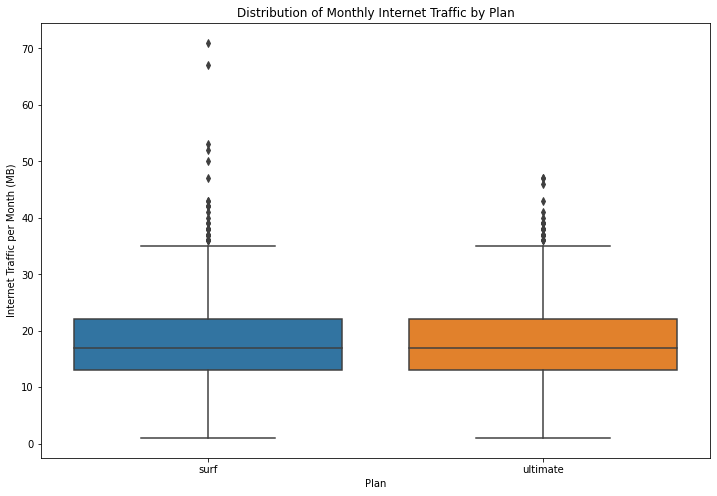

In [56]:
# Compare the amount of internet traffic consumed by users per plan
plt.figure(figsize=(12, 8))
sns.boxplot(x='plan_name', y='traffic_per_month', data=merged_df)
plt.title('Distribution of Monthly Internet Traffic by Plan')
plt.xlabel('Plan')
plt.ylabel('Internet Traffic per Month (MB)')
plt.show()

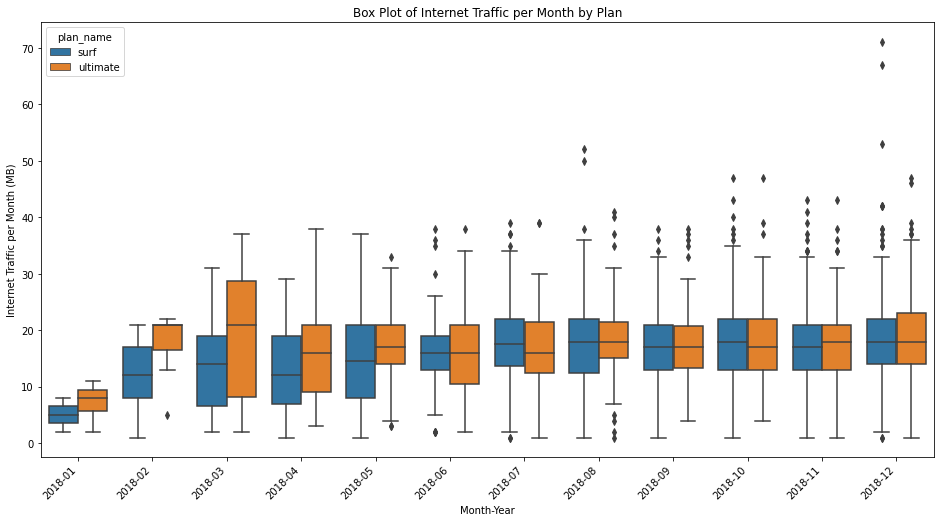

In [57]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='month_year', y='traffic_per_month', hue='plan_name', data=merged_df)
plt.title("Box Plot of Internet Traffic per Month by Plan")
plt.xlabel('Month-Year')
plt.ylabel('Internet Traffic per Month (MB)')
plt.xticks(rotation=45, ha='right')
plt.show()

[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

 both plans have similar internet traffic. But on the first 4 months, ultimate plan have more internet traffic during that month.

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

In [58]:
revenue_stats = merged_df.groupby('plan_name')['monthly_revenue']
revenue_stats.describe()

,count,mean,std,min,25%,50%,75%,max
plan_name,,,,,,,,
surf,1573.0,33.544556,6.757427,20.339766,30.000000,31.596016,37.298828,69.421094
ultimate,720.0,74.029736,3.071634,70.000000,71.540869,74.075391,75.980674,84.837734


In [59]:
total_revenue = merged_df.groupby('plan_name')['monthly_revenue'].sum()
total_revenue

plan_name
surf        52765.587266
ultimate    53301.410273
Name: monthly_revenue, dtype: float64

In [60]:
revenue_stats = merged_df.groupby(['month_year', 'plan_name'])['monthly_revenue']
revenue_stats.describe()

count       mean       std        min        25%  \
month_year plan_name                                                     
2018-01    surf         2.0  29.734063  0.376092  29.468125  29.601094   
           ultimate     4.0  71.675098  1.825675  70.000000  70.145254   
2018-02    surf         9.0  30.377613  7.225875  21.269766  29.586016   
           ultimate     7.0  73.762628  3.439667  70.000000  70.507090   
2018-03    surf        23.0  30.787041  5.501044  21.309531  29.852656   
           ultimate    12.0  72.722412  3.027868  70.000000  70.000000   
2018-04    surf        50.0  31.293184  6.725691  20.579766  27.735801   
           ultimate    21.0  72.755696  2.392646  70.000000  70.777344   
2018-05    surf        77.0  33.080896  6.866613  20.529531  30.000000   
           ultimate    29.0  73.377654  3.033297  70.000000  70.000000   
2018-06    surf        97.0  32.817495  6.203749  20.918125  30.000000   
           ultimate    47.0  73.298153  2.583099  70.000000  71.224688   
2018-07    surf       121.0  33.512153  7.147327  20.659297  30.000000   
           ultimate    59.0  73.922736  3.295506  70.000000  70.709180   
2018-08    surf       162.0  33.031843  6.489864  20.339766  30.000000   
           ultimate    71.0  73.990457  3.013058  70.000000  71.862852   
2018-09    surf       194.0  33.109767  6.136949  20.429766  30.000000   
           ultimate    86.0  74.087411  3.028951  70.000000  72.063174   
2018-10    surf       237.0  33.581149  6.565585  20.359297  30.000000   
           ultimate   106.0  74.356929  3.024998  70.000000  72.151592   
2018-11    surf       283.0  33.609296  6.430724  20.789766  30.000000   
           ultimate   127.0  74.207831  3.176217  70.000000  71.327793   
2018-12    surf       318.0  34.999518  7.497444  20.889531  30.000000   
           ultimate   151.0  74.386474  3.157246  70.000000  72.205645   

                            50%        75%        max  
month_year plan_name                                   
2018-01    surf       29.734063  29.867031  30.000000  
           ultimate   71.677598  73.207441  73.345195  
2018-02    surf       30.000000  30.000000  46.177422  
           ultimate   74.580391  76.088555  78.566719  
2018-03    surf       30.000000  31.361250  45.585781  
           ultimate   71.876973  74.988398  77.973555  
2018-04    surf       30.000000  35.695371  55.036484  
           ultimate   72.704688  74.275195  78.146211  
2018-05    surf       30.000000  37.674844  54.285781  
           ultimate   73.688359  74.774062  79.472031  
2018-06    surf       30.000000  35.892969  54.915078  
           ultimate   73.317852  74.792227  79.074570  
2018-07    surf       31.245078  37.116719  55.891797  
           ultimate   73.745703  75.984629  82.550391  
2018-08    surf       30.901836  36.430723  55.266719  
           ultimate   73.994062  75.993047  83.538867  
2018-09    surf       31.516484  36.527871  57.022734  
           ultimate   74.190703  75.653330  83.284570  
2018-10    surf       31.816484  37.863906  57.987656  
           ultimate   74.684629  76.091367  83.296719  
2018-11    surf       32.456250  37.479844  62.785547  
           ultimate   74.233047  76.134062  83.044570  
2018-12    surf       33.564141  39.023457  69.421094  
           ultimate   74.280898  76.238496  84.837734

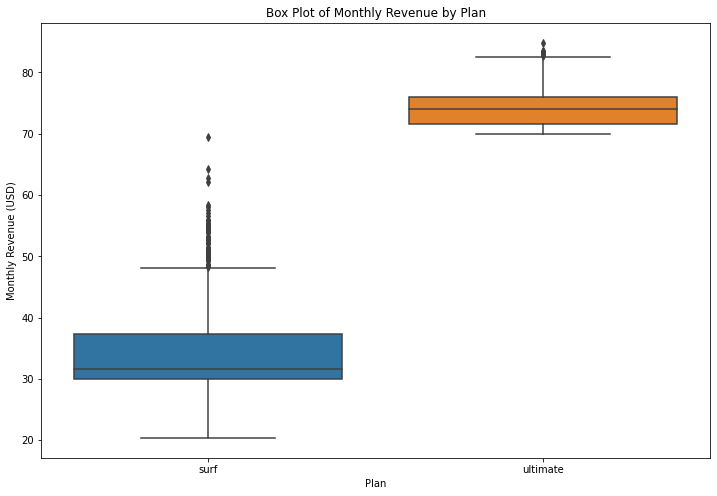

In [61]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='plan_name', y='monthly_revenue', data=merged_df)
plt.title("Box Plot of Monthly Revenue by Plan")
plt.xlabel('Plan')
plt.ylabel('Monthly Revenue (USD)')
plt.show()

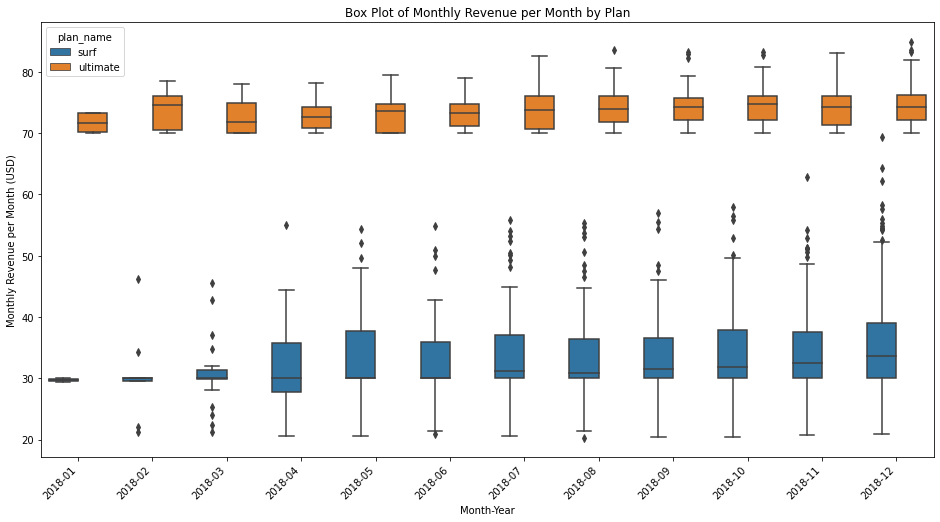

In [62]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='month_year', y='monthly_revenue', hue='plan_name', data=merged_df)
plt.title("Box Plot of Monthly Revenue per Month by Plan")
plt.xlabel('Month-Year')
plt.ylabel('Monthly Revenue per Month (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

[Formulate conclusions about how the revenue differs between the plans.]

 Generally, the Surf plans demonstrate a higher revenue compate to other plan. ultimate plan have a higher revenue on the first 3 months.

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

H0: μ(Ultimate) = μ(Surf)
h1: μ(Ultimate) != μ(Surf)

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Correct interpretation of the null and alternative hypothesis

## Test statistical hypotheses

In [63]:
revenue_ultimate = merged_df.loc[(merged_df['plan_name'] == 'ultimate') & (~pd.isna(merged_df['monthly_revenue']))]['monthly_revenue']
revenue_surf = merged_df.loc[(merged_df['plan_name'] == 'surf') & (~pd.isna(merged_df['monthly_revenue']))]['monthly_revenue']

In [64]:
t_statistic, p_value = stats.ttest_ind(revenue_ultimate, revenue_surf, equal_var=False)
print(t_statistic, p_value)

197.23493136373284 0.0


In [65]:
# Test the hypotheses
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is sufficient evidence to suggest a significant difference in average revenue.")
else:
    print("Accept the null hypothesis. There is no sufficient evidence to suggest a significant difference in average revenue.")

Reject the null hypothesis. There is sufficient evidence to suggest a significant difference in average revenue.


[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [66]:
revenue_nynj = merged_df.loc[merged_df['city'].str.contains('NY-NJ', case=False, na=False)]['monthly_revenue'].dropna()
revenue_other_regions = merged_df.loc[~merged_df['city'].str.contains('NY-NJ', case=False, na=False)]['monthly_revenue'].dropna()

In [67]:
t_statistic, p_value = stats.ttest_ind(revenue_nynj, revenue_other_regions, equal_var=False)
print(t_statistic, p_value)

-7.041049642887933 5.086903092587233e-12


In [68]:
# Test the hypotheses
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is sufficient evidence to suggest a significant difference in average revenue.")
else:
    print("Accept the null hypothesis. There is no sufficient evidence to suggest a significant difference in average revenue.")

Reject the null hypothesis. There is sufficient evidence to suggest a significant difference in average revenue.


## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

Based on the study both plans have generally same behaviour and there are not much difference in their total revenue made for each plan. The number of unique user using surf plan is 333 while ultimate is 157, there are twice more surf user that ultimate plan user. This indicate that the advertisement for ultimate plan was not that good. telecom need to ensure that customer feels that ultimate plan is more worth.

There are several ways to promote the Ultimate plan:
- Create limited-time promotional offers for the Ultimate plan, such as discounted monthly fees.
- Consider adjusting the pricing structure of the Ultimate plan to make it more competitive or enticing compared to the Surf plan.
- Bundle additional services, features, or premium content with the Ultimate plan to enhance its overall value proposition.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

You've done a great job. There are a few things that need to be fixed

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__


Otherwise it's great😊. Your project is begging for github =)   
    
Congratulations on the successful completion of the project 😊👍
And I wish you success in new works 😊